# Mortality Dataset Project 

PROBLEM STATEMENT: Trends/Changes in Mortality


**STEPS:**
```
- Data Loading
- Data Cleaning
- Descriptive Analysis
- EDA
```
**DATA:**
```
- Data is taken from CDC.gov
```

In [231]:
import pandas as pd
import numpy as np
import re
import math

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

## Data Loading

In [232]:
df = pd.read_csv("VS17MORT.csv", low_memory=False, nrows=10000) # Mortality dataset's DATAFRAME

In [233]:
df.head(5)

,Resident_Status,Education,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Sub_Flag,Age_Recode_52,Age_Recode_27,Age_Recode_12,...,RA18,RA19,RA20,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,,101,M,1,71,,40,20,9,...,,,,1,,,1,1,100,6
1,1,,101,M,1,74,,40,20,9,...,,,,1,,,1,1,100,6
2,1,,101,M,1,59,,37,17,8,...,,,,1,,,1,1,100,6
3,1,,101,M,1,90,,44,24,11,...,,,,3,,,2,3,100,8
4,1,,101,M,1,66,,39,19,9,...,,,,1,,,1,1,100,6


In [234]:
df.shape

(10000, 75)

In [235]:
df.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [236]:
# df = df.drop(columns=[" Education"])
df[" Education"].unique()

array([' '], dtype=object)

## Data Cleaning

In [237]:
def removeSpaces(item):
    regex = re.compile("\S+")
    return regex.findall(item)[0] if type(item) == str else item

def cleanColumns(dataFrame):
    return dataFrame.rename(columns=lambda x: removeSpaces(x))

In [238]:
df = cleanColumns(df)

In [239]:
df.columns

Index(['Resident_Status', 'Education', 'Month_Of_Death', 'Sex', 'Age_Key',
       'Age_Value', 'Age_Sub_Flag', 'Age_Recode_52', 'Age_Recode_27',
       'Age_Recode_12', 'Infant_Age_Recode_22', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'EAC14', 'EAC15', 'EAC16', 'EAC17', 'EAC18', 'EAC19', 'EAC20',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14', 'RA15',
       'RA16', 'RA17', 'RA18', 'RA19', 'RA20', 'Race', 'Race_Bridged',
       'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5', 'H

In [240]:
def cleanEmptyStringValues(_df):
    return _df.applymap(lambda x: x if str(x) != ' ' else None)

In [241]:
df = cleanEmptyStringValues(df)

In [242]:
def fixStringValues(_df):
    return _df.applymap(lambda x: removeSpaces(x))

In [243]:
df = fixStringValues(df)

In [244]:
def replaceNAWithMode(_df):
    for column in _df.columns:
        try:
            _mode = _df[column].mode()[0]
            _df[column] = _df[column].fillna(_mode)
        except:
            pass
    return _df

In [245]:
df = replaceNAWithMode(df)

In [246]:
df = df.drop(columns=[x for x in df.columns if len(df[x].unique()) <= 1 and df[x].unique()[0] == None])

In [247]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [248]:
def tryConvertingToNumber(value):
    try:
        val = int(value)
        return val
    except:
        return value

df = df.applymap(lambda x: tryConvertingToNumber(x))

In [249]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [250]:
df.head()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Infant_Age_Recode_22,Place_Of_Death,...,RA11,RA12,RA13,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,101,M,1,71,40,20,9,2,1,...,R688,J969,R068,1,1,2,1,1,100,6
1,1,101,M,1,74,40,20,9,2,1,...,R688,J969,R068,1,1,2,1,1,100,6
2,1,101,M,1,59,37,17,8,2,4,...,R688,J969,R068,1,1,2,1,1,100,6
3,1,101,M,1,90,44,24,11,2,4,...,R688,J969,R068,3,1,2,2,3,100,8
4,1,101,M,1,66,39,19,9,2,4,...,R688,J969,R068,1,1,2,1,1,100,6


In [251]:
df.tail()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Infant_Age_Recode_22,Place_Of_Death,...,RA11,RA12,RA13,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
9995,1,102,F,1,71,40,20,9,2,6,...,R688,J969,R068,1,1,2,1,1,100,6
9996,2,101,M,1,75,41,21,10,2,1,...,R688,J969,R068,1,1,2,1,1,100,6
9997,1,102,F,1,82,42,22,10,2,6,...,R688,J969,R068,1,1,2,1,1,100,6
9998,1,102,F,1,80,42,22,10,2,1,...,R688,J969,R068,1,1,2,1,1,100,6
9999,1,102,M,1,51,36,16,7,2,1,...,R688,J969,R068,1,1,2,1,1,100,6


## Descriptive Statistics

In [252]:
for column in df.columns:
    try:
        mean = df[column].mean()
        if mean > 0:
            print(df[column].describe())
    except:
        pass

count    10000.000000
mean         1.200200
std          0.467912
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Resident_Status, dtype: float64
count    10000.000000
mean       103.534100
std          3.522169
min        101.000000
25%        101.000000
50%        102.000000
75%        106.000000
max        112.000000
Name: Month_Of_Death, dtype: float64
count    10000.000000
mean         1.020900
std          0.272159
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: Age_Key, dtype: float64
count    10000.000000
mean        69.597400
std         24.977292
min          1.000000
25%         59.000000
50%         73.000000
75%         84.000000
max        999.000000
Name: Age_Value, dtype: float64
count    10000.000000
mean        39.306800
std          4.640369
min          1.000000
25%         37.000000
50%         40.000000
75%         42.000000
max  

In [253]:
Q1 = df["Age_Value"].quantile(0.25)
Q3 = df["Age_Value"].quantile(0.75)

print("INTER-QUARTILE RANGE (IQR) For Age:", Q3-Q1)

INTER-QUARTILE RANGE (IQR) For Age: 25.0


In [254]:
print("Life Expectancy regarless of gender: {}(mean) {}(median) {}(mode)".format(round(df["Age_Value"].mean()), df["Age_Value"].median(), df["Age_Value"].mode()[0]))

Life Expectancy regarless of gender: 70.0(mean) 73.0(median) 84(mode)


In [255]:
mD = df[df["Sex"] == "M"]
print("Life Expectancy for Males: {}(mean) {}(median) {}(mode)".format(round(mD["Age_Value"].mean()), mD["Age_Value"].median(), mD["Age_Value"].mode()[0]))

Life Expectancy for Males: 67.0(mean) 69.0(median) 74(mode)


In [256]:
fD = df[df["Sex"] == "F"]
print("Life Expectancy for Females: {}(mean) {}(median) {}(mode)".format(round(fD["Age_Value"].mean()), fD["Age_Value"].median(), fD["Age_Value"].mode()[0]))

Life Expectancy for Females: 73.0(mean) 77.0(median) 82(mode)


## Exploratry Data Analysis (EDA)

### If married people die more than unmarried and other related

In [257]:
dfMarried = df[(df['Marital_Status'] == 'M') ]

In [258]:
dfSingle = df[(df['Marital_Status'] == 'S') ]

In [259]:
dfWidow = df[(df['Marital_Status'] == 'W') ]

In [260]:
dfDivorce = df[(df['Marital_Status'] == 'D') ]

In [261]:
dfUnknown = df[(df['Marital_Status'] == 'U') ]

In [262]:
marriedPer = dfMarried.shape[0] / df.shape[0] * 100
str(math.ceil(marriedPer)) + ' %'

'37 %'

In [263]:
singlePer = dfSingle.shape[0] / df.shape[0] * 100
str(math.ceil(singlePer)) + ' %'

'15 %'

In [264]:
widowPer = dfWidow.shape[0] / df.shape[0] * 100
str(math.ceil(widowPer)) + ' %'

'29 %'

In [265]:
divorcePer = dfDivorce.shape[0] / df.shape[0] * 100
str(math.ceil(divorcePer)) + ' %'

'19 %'

In [266]:
unknownPer = dfUnknown.shape[0] / df.shape[0] * 100
str(math.ceil(unknownPer)) + ' %'

'2 %'

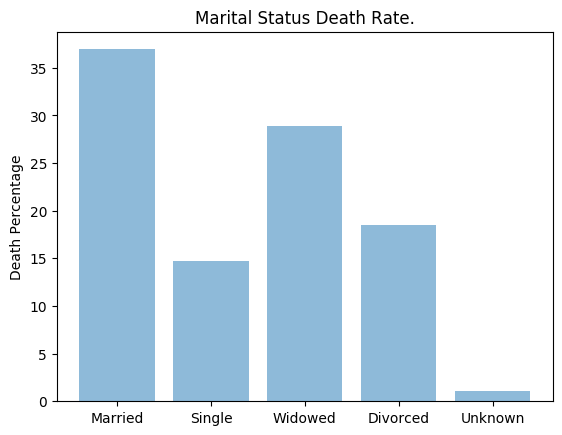

In [267]:

objects = ('Married', 'Single', 'Widowed', 'Divorced', 'Unknown')
y_pos = np.arange(len(objects))
percentages = [marriedPer, singlePer, widowPer, divorcePer, unknownPer]

plt.bar(y_pos, percentages, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Death Percentage')
plt.title('Marital Status Death Rate.')

plt.show();

### What are and will be the most common causes of death (This requires ML and right now is only w/o ML part)

In [268]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [269]:
objects = ['Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 'Self-Inflicted', 'Natural']

In [270]:
len(objects)

7

In [271]:
sortedCauseOfDeath = sorted(df["Manner_Of_Death"].unique())

In [272]:
labels = [objects[x-1] for x in sortedCauseOfDeath]

In [273]:
def getColumnPercentages(_df, column):
    return [((_df[_df[column] == uVal].shape[0]/df[column].shape[0])*100) for uVal in sorted(_df[column].unique())]

In [274]:
deathCausePcts = getColumnPercentages(df, "Manner_Of_Death")

In [275]:
len(deathCausePcts)

6

In [276]:
for i in range(0, len(deathCausePcts)):
    print(f"{labels[i]}: {deathCausePcts[i]}%");

Accident: 6.61%
Suicide: 2.94%
Homicide: 1.22%
Pending investigation: 0.03%
Could not determine: 0.91%
Natural: 88.29%


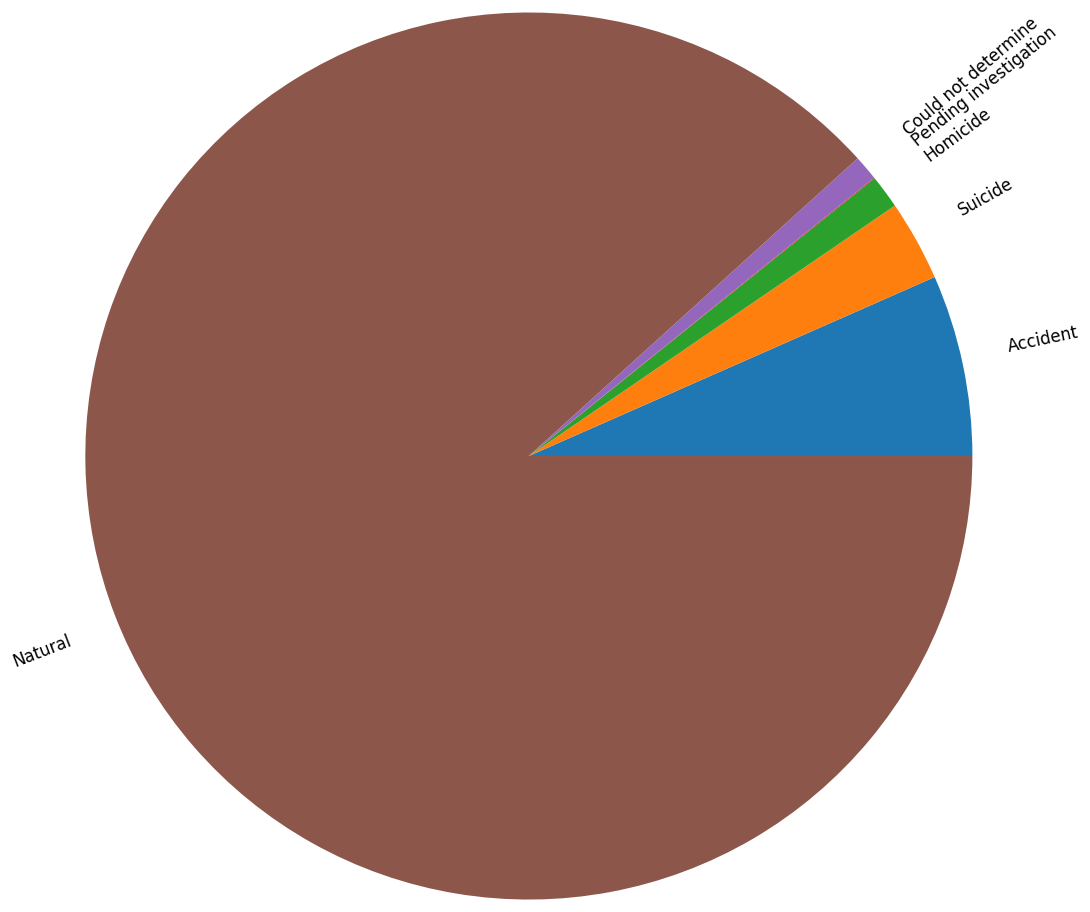

In [277]:
# percentages = [manner1Per, manner2Per, manner3Per, manner4Per, manner5Per, manner6Per, manner7Per]
# idx = deathCausePcts.index(0.0)
# percentages = deathCausePcts[:idx] + deathCausePcts[idx+1:]
# objects = objects[:idx] + objects[idx+1:]

plt.pie(
    x=deathCausePcts,
    labels=labels,
    rotatelabels=45,
    radius=3,
    textprops={
        "fontsize": 12
    }
)
# plt.bar(y_pos, percentages, align='center', alpha=0.5)
# plt.xticks(y_pos, objects, rotation=30)
# plt.ylabel('Death Percentage')
# plt.title('Most Common Causes Of Death.')
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.show();

### Life expectancy for certain age groups

In [278]:
def getGroupedValues(dataF, colName, gap, total, isLast = False):
    pValue = 0
    nValue = gap
    values = []
    for i in range(0, total):
        values.append(dataF[(dataF[colName] >= pValue) & (dataF[colName] < nValue)].shape[0])
#         print(f"{pValue} - {nValue}")
        pValue = nValue
        nValue += gap
    if isLast:
        values.append(dataF[dataF[colName] >= nValue].shape[0])
    return values

In [279]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12',
       'Infant_Age_Recode_22', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'Race',
       'Race_Bridged', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

[106, 98, 284, 356, 513, 1150, 1860, 2148, 2300, 1124, 3]


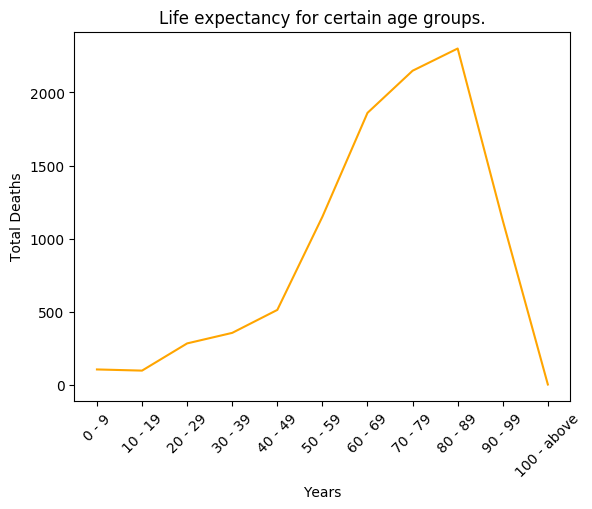

In [280]:
year = ['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '100 - above']
numberOfDeaths = getGroupedValues(df, "Age_Value", 10, len(year)-1, True)
print(numberOfDeaths)
plt.plot(year, numberOfDeaths, color='orange')
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Life expectancy for certain age groups.')
plt.show()

### Death Rate Comparison/Correlation between both genders

In [281]:
maleData = df[df["Sex"] == "M"]

maleData.shape

(5378, 59)

In [282]:
femaleData = df[df["Sex"] == "F"]

femaleData.shape

(4622, 59)

In [283]:
c_years = year[:-2]
c_years.append('90 - 100')
c_years.append('100 - above')

In [284]:
maleDeaths = getGroupedValues(maleData, "Age_Value", 10, len(c_years)-1, True)
femaleDeaths = getGroupedValues(femaleData, "Age_Value", 10,len(c_years)-1, True)

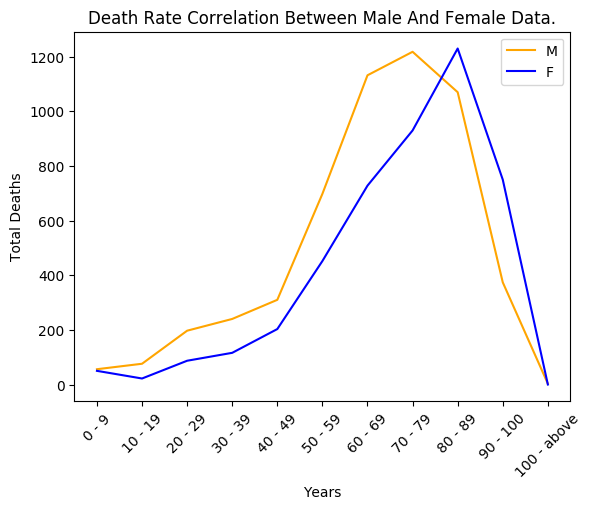

In [285]:
plt.plot(c_years, maleDeaths, color='orange')
# plt.show()
plt.plot(c_years, femaleDeaths, color='blue')
plt.legend(df["Sex"].unique())
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Death Rate Correlation Between Male And Female Data.')
plt.show()

### How causes of death have changed compared to past 10 years

In [303]:
odf = pd.read_csv("VS07MORT.csv", nrows=100000)

odf.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [304]:
odf.shape

(100000, 75)

In [305]:
odf = cleanEmptyStringValues(odf)

odf = replaceNAWithMode(odf)

In [306]:
odf = cleanColumns(odf)

In [307]:
odf = odf.drop(columns=[x for x in odf.columns if len(odf[x].unique()) <= 1 and odf[x].unique()[0] == None])

In [308]:
odf = odf.applymap(tryConvertingToNumber)

### Old (Other Dataset) Data Cleaning and Analysis

In [309]:
sortedCauses = sorted(odf["Manner_Of_Death"].unique())

sortedCauses

[1, 2, 3, 4, 5, 7]

In [310]:
oldDeathPcts = getColumnPercentages(odf, "Manner_Of_Death")

In [311]:
for i in range(0, len(oldDeathPcts)):
    print(f"{labels[i]}: {oldDeathPcts[i]}%")

Accident: 60.589999999999996%
Suicide: 18.2%
Homicide: 11.28%
Pending investigation: 1.32%
Could not determine: 6.279999999999999%
Natural: 902.33%


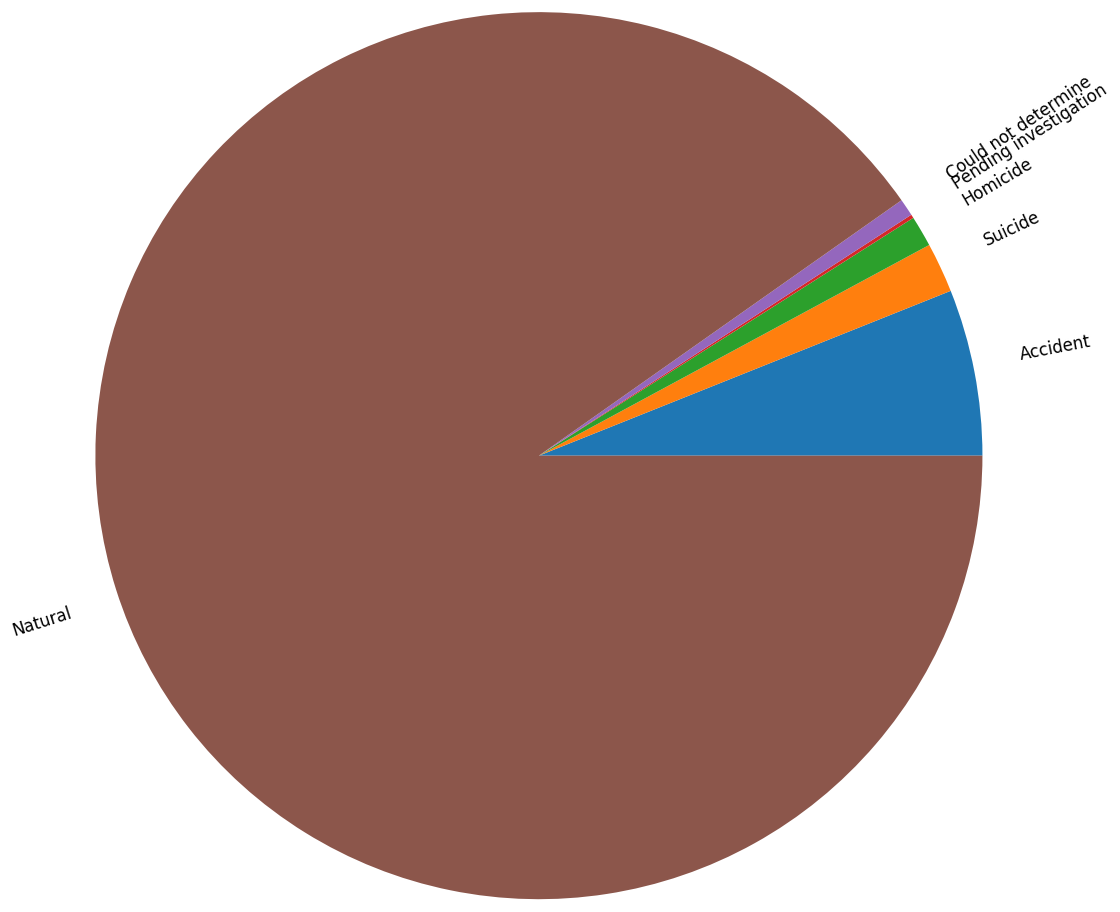

In [312]:
plt.pie(
    x=oldDeathPcts,
    labels=labels,
    rotatelabels=45,
    radius=3,
    textprops={
        "fontsize": 12
    }
)

plt.show()

**Comparison between 10 years past and 2017 Death rates:**

In [313]:

for i in range(0, min(len(oldDeathPcts), len(deathCausePcts))):
    print(f"{labels[i]}: {math.ceil(oldDeathPcts[i])}%(old), {math.ceil(deathCausePcts[i])}%(current)")

Accident: 61%(old), 7%(current)
Suicide: 19%(old), 3%(current)
Homicide: 12%(old), 2%(current)
Pending investigation: 2%(old), 1%(current)
Could not determine: 7%(old), 1%(current)
Natural: 903%(old), 89%(current)


In [314]:
len(deathCausePcts)

6

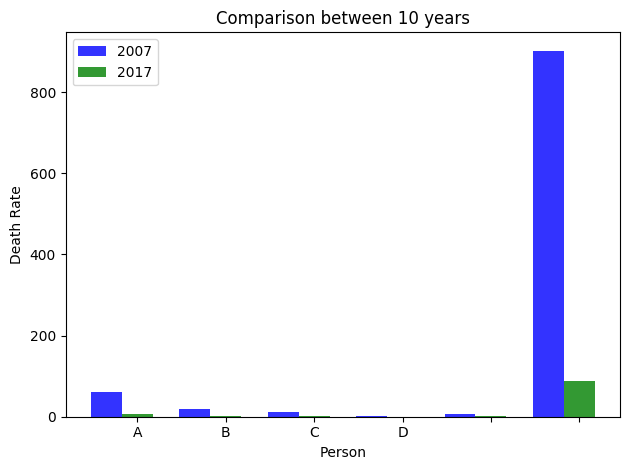

In [315]:
n_groups = len(deathCausePcts)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, oldDeathPcts, bar_width,
alpha=opacity,
color='b',
label='2007')

rects2 = plt.bar(index + bar_width, deathCausePcts, bar_width,
alpha=opacity,
color='g',
label='2017')

plt.xlabel('Person')
plt.ylabel('Death Rate')
plt.title('Comparison between 10 years')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()